In [42]:
import re 
import pandas as pd
import nltk

# Loading the training dataset

In [2]:
training_set = pd.read_csv('train.csv')

In [3]:
training_set.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [44]:
training_set.shape

(27480, 3)

In [5]:
training_set.dtypes

textID       object
text         object
sentiment    object
dtype: object

# Data Cleaning 

### 1. Droping null texts 

In [6]:
training_set.dropna(subset=['text'], inplace=True)

### 2. Removing punctuations and symbols

In [7]:
training_set.text = training_set.text.apply(lambda x: re.sub(r'[^\w\s]', '', x) )

### 3. Removing stopwords

In [8]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
training_set.text = training_set.text.apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stopwords]))

### 4. Removing links 

In [9]:
training_set.text = training_set.text.apply(lambda x: re.sub(r'\(?http\S+', '', x))

### 5. Lemmatization and Tokenizing

In [10]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer

lemmatizer = nltk.WordNetLemmatizer()
training_set.text = training_set.text.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))

In [11]:
training_set.dropna(subset=['text'], inplace=True)
trainint_set = training_set[training_set.text != '']

## Data Exploration

In [12]:
training_set.head() 

,textID,text,sentiment
0,cb774db0d1,Id responded going,neutral
1,549e992a42,Sooo SAD miss San Diego,negative
2,088c60f138,bos bullying,negative
3,9642c003ef,interview leave alone,negative
4,358bd9e861,Sons couldnt put release already bought,negative


### 1. Wordcloud 

In [13]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

word_str = training_set.iloc[:,:].text.str.cat(sep='. ')


Bad key "text.kerning_factor" on line 4 in
D:\Users\micha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [14]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

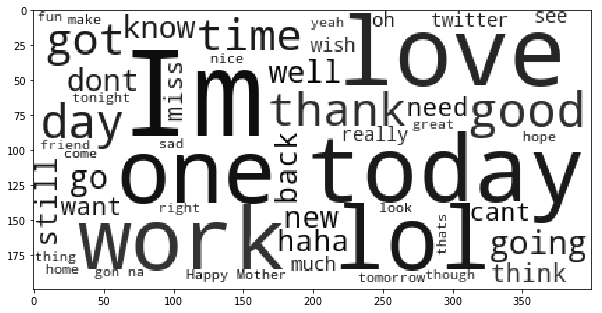

In [15]:
stp = STOPWORDS.copy()
wc = WordCloud(background_color="white", max_words=50,  stopwords=stp)
# generate word cloud
wc.generate(word_str)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.show()

# Data Analysis

## Use Naive Bayes model from sklearn 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import metrics
import numpy as np

In [17]:
vectorizer = CountVectorizer()

In [49]:
training_set.dropna(subset=['text'], inplace=True)
train_X = vectorizer.fit_transform(training_set.text)
train_X

<27480x26934 sparse matrix of type '<class 'numpy.int64'>'
	with 193231 stored elements in Compressed Sparse Row format>

In [52]:
train_X.dtype


dtype('int64')

In [53]:
train_X.shape

(27480, 26934)

## Initialize and train models

### 1. MultinomialNB model

In [25]:
nb = MultinomialNB()
nb.fit(train_X, training_set.sentiment)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### 2. GaussianNB model

In [23]:
gnb = GaussianNB()
gnb.fit(train_X.toarray(), training_set.sentiment)

GaussianNB(priors=None)

## Load and preprocess the testing dataset 

In [26]:
testing_set = pd.read_csv('test.csv')

In [28]:

## 1. Droping null texts
testing_set.dropna(subset=['text'], inplace=True)
## 2. Removing punctuations and symbols
testing_set.text = testing_set.text.apply(lambda x: re.sub(r'[^\w\s]', '', x) )
## 3. Removing stopwords
testing_set.text = testing_set.text.apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stopwords]))
## 4. Removing links
testing_set.text = testing_set.text.apply(lambda x: re.sub(r'\(?http\S+', '', x))
## 5. Lemmatization and Tokenizing
testing_set.text = testing_set.text.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))

In [29]:
testing_set.dropna(subset=['text'], inplace=True)
testing_set.head()

,textID,text
0,f87dea47db,Last session day
1,96d74cb729,Shanghai also really exciting precisely skyscr...
2,eee518ae67,Recession hit Veronique Branquinho quit compan...
3,01082688c6,happy bday
4,33987a8ee5,like


In [48]:
## vectorizing the test's texts 
test_X = vectorizer.transform(testing_set.text)

(3534, 26934)

## Get prediction from both models

In [34]:
predicted = nb.predict(test_X)
predicted2 = gnb.predict(test_X.toarray())

In [35]:
prediction_data = pd.read_csv('test.csv')
prediction_data2 = pd.read_csv('test.csv')

In [36]:
prediction_data = prediction_data.assign(sentiment = predicted)
prediction_data2 = prediction_data.assign(sentiment = predicted2)

## Format output prediction

In [39]:
kaggle_subm = prediction_data.drop('text', axis=1)
kaggle_subm2 = prediction_data2.drop('text', axis=1)

In [41]:
kaggle_subm.to_csv('Kaggle_subm.csv',index=False)
kaggle_subm2.to_csv('Kaggle_subm2.csv',index=False)